In [1]:
 # pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels
import re

In [4]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
#!pip install xgboost

In [9]:
from xgboost import XGBClassifier

In [10]:
#!pip install catboost

In [11]:
from catboost import CatBoostClassifier

In [12]:
#!pip install lightgbm

In [13]:
import lightgbm as lgb

In [14]:
from lightgbm import LGBMClassifier

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import traceback
import string

In [18]:
#!pip install scorecardpy

In [19]:
import scorecardpy as sc

In [20]:
import mlxtend

In [21]:
pd.set_option('display.max_columns', None)  

In [22]:
pd.set_option('display.max_colwidth', None)

In [23]:
train = pd.read_csv('./dataset/train.csv')
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [24]:
train["credit_card_default"].value_counts(normalize=True)

credit_card_default
0    0.918797
1    0.081203
Name: proportion, dtype: float64

In [25]:
df = train.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


# EDA

In [26]:
# check shape and length
print(df.shape)

(30000, 19)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

## cat feats - num feats

In [28]:
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(cat_feats))
print("no of num feats: ", len(num_feats))

no of cat feats:  6
no of num feats:  13


In [29]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [30]:
num_feats

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [31]:
df.duplicated().sum()

np.int64(0)

## isnull()

In [32]:
df.isnull().sum().sort_values(ascending=False).head(10)

no_of_children          502
owns_car                369
no_of_days_employed     315
yearly_debt_payments     62
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
name                      0
customer_id               0
dtype: int64

In [33]:
df["credit_card_default"].value_counts()

credit_card_default
0    27537
1     2463
Name: count, dtype: int64

In [34]:
df["credit_card_default"].value_counts(normalize=True)

credit_card_default
0    0.9179
1    0.0821
Name: proportion, dtype: float64

## Fillnan: Categorical features

In [35]:
df[cat_feats].isnull().sum()

customer_id          0
name                 0
gender               0
owns_car           369
owns_house           0
occupation_type      0
dtype: int64

In [36]:
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
customer_id
CST_145733    0.000033
CST_110128    0.000033
CST_155400    0.000033
CST_155397    0.000033
CST_148964    0.000033
                ...   
CST_154013    0.000033
CST_106655    0.000033
CST_131350    0.000033
CST_131305    0.000033
CST_163708    0.000033
Name: proportion, Length: 30000, dtype: float64


Column Name: name
name
Jonathan              0.004367
Jonathan Stempel      0.004133
Jessica               0.003600
Sarah                 0.003533
David                 0.003467
                        ...   
Simpson               0.000033
Eisenhammer           0.000033
Svetlana Kovalyova    0.000033
Ek                    0.000033
Fenton                0.000033
Name: proportion, Length: 3514, dtype: float64


Column Name: gender
gender
F      0.657700
M      0.342267
XNA    0.000033
Name: proportion, dtype: float64


Column Name: owns_car
owns_car
N    0.660862
Y    0.339138
Name: proportion, dtype: float64


Column Name: owns_house
owns_house
Y    0.6

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.
That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable

### Gender

In [37]:
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [38]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

gender
F    19731
M    10269
Name: count, dtype: int64

### Owns car

In [39]:
# fill owns_car with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

C:\Users\omend\AppData\Local\Temp\ipykernel_20632\3735598712.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)


In [40]:
df["owns_car"].value_counts(normalize=True)

owns_car
N    0.665033
Y    0.334967
Name: proportion, dtype: float64

In [41]:
df[cat_feats].isnull().sum()

customer_id        0
name               0
gender             0
owns_car           0
owns_house         0
occupation_type    0
dtype: int64

## Fillnan:  Numerical features

In [42]:
df[num_feats].isnull().sum().sort_values(ascending=False).head(10)

no_of_children          502
no_of_days_employed     315
yearly_debt_payments     62
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
net_yearly_income         0
credit_limit              0
credit_limit_used(%)      0
dtype: int64

### no_of_days_employed

In [43]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [44]:
df.no_of_days_employed.isna().sum()

np.int64(0)

### yearly_debt_payments

In [45]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
for i in yearDebt_credit.index:
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), yearDebt_credit[i], df['yearly_debt_payments'])

In [46]:
df['yearly_debt_payments'].isna().sum()

np.int64(0)

In [47]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

no_of_children          502
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
dtype: int64

### migrant_worker

In [48]:
df['migrant_worker'].mode()

0    0.0
Name: migrant_worker, dtype: float64

In [49]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

C:\Users\omend\AppData\Local\Temp\ipykernel_20632\341355721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)


np.int64(0)

### total_family_members

In [50]:
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

# check null values count
df['total_family_members'].isna().sum()

C:\Users\omend\AppData\Local\Temp\ipykernel_20632\625074398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)


np.int64(0)

In [51]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

no_of_children         502
credit_score             6
age                      0
no_of_days_employed      0
net_yearly_income        0
dtype: int64

### no_of_children

In [52]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

C:\Users\omend\AppData\Local\Temp\ipykernel_20632\1293685831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)


### credit_score

In [53]:
# check medians of credit_score wrt credit_card_default
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()

for i in cred_score.index:
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), cred_score[i], df['credit_score'])

# check for null values in 'credit_score'
df['credit_score'].isna().sum()

np.int64(0)

In [54]:
df[num_feats].isnull().sum().sort_values(ascending = False)

age                        0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [55]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

## Concentrated EDA

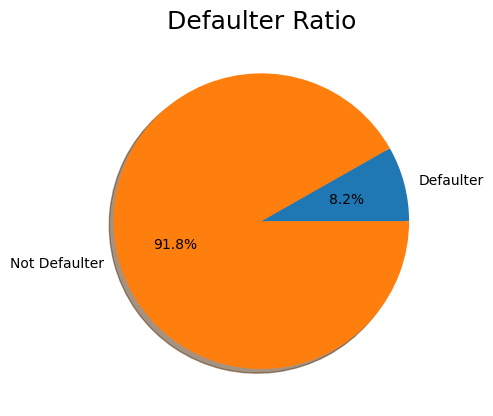

In [56]:
# Ploting Credit_default ratio
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

C:\Users\omend\AppData\Local\Temp\ipykernel_20632\265951273.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


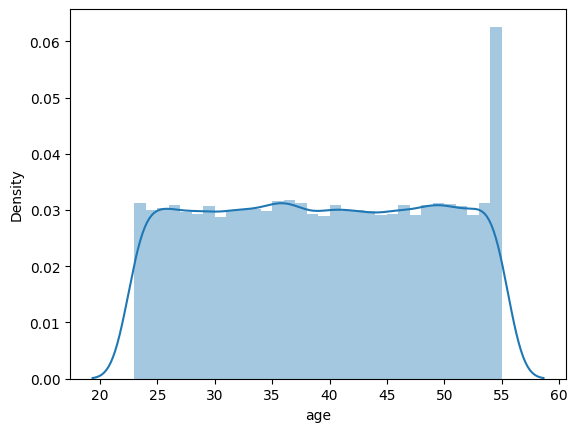

In [57]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(df['age'])
plt.show()

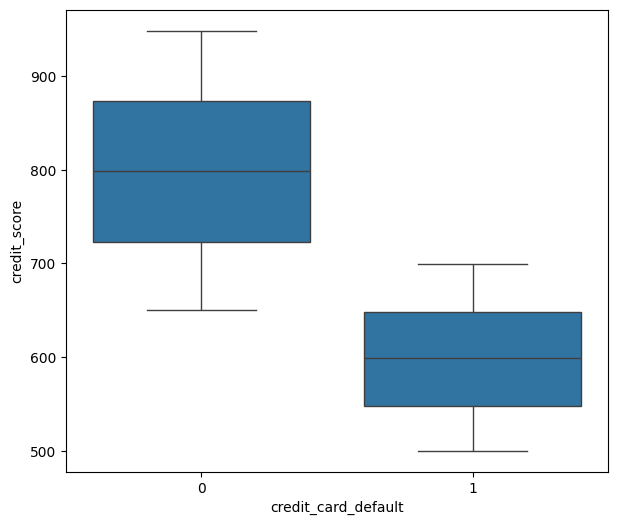

In [58]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(x='credit_card_default', y='credit_score', data=df)

plt.show()

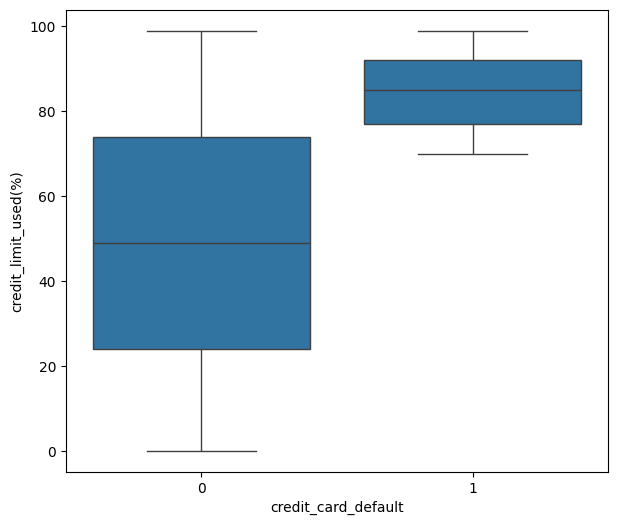

In [59]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
sns.boxplot(x='credit_card_default', y='credit_limit_used(%)', data=df)

plt.show()

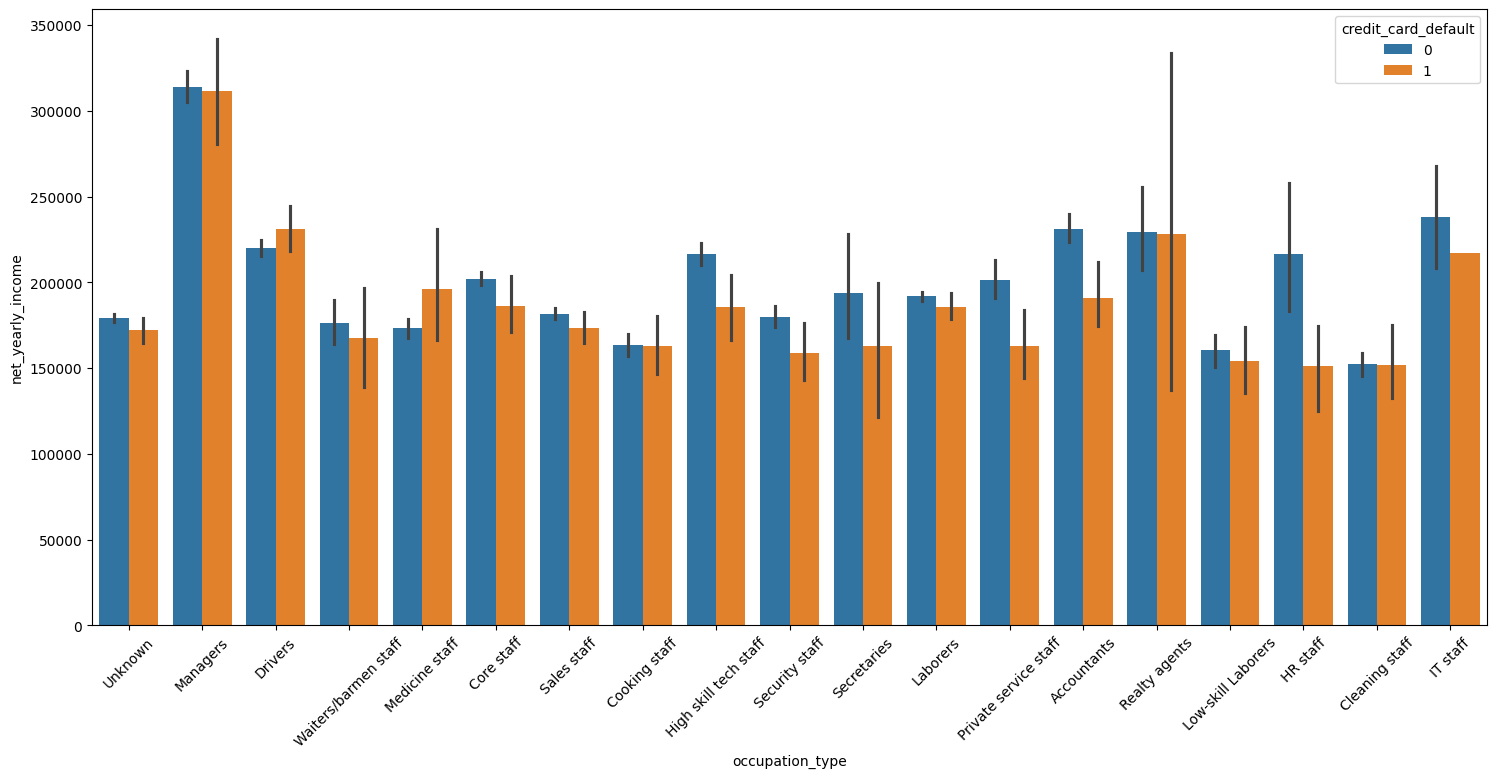

In [60]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

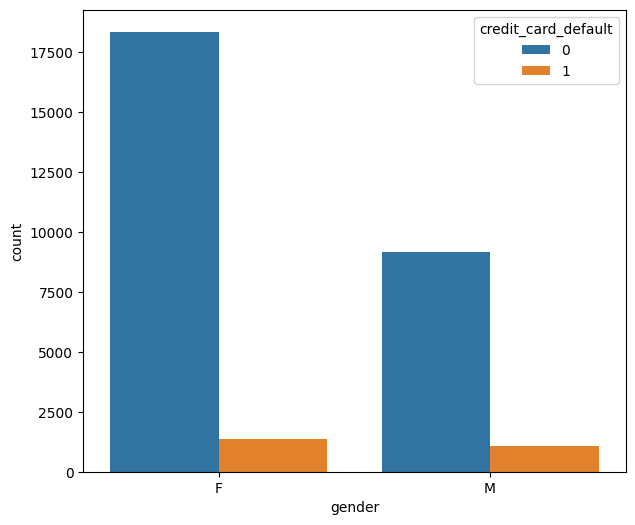

In [61]:
# male or female defaulters
plt.figure(figsize=[7,6])
sns.countplot(x='gender', hue='credit_card_default', data=df)
plt.show()

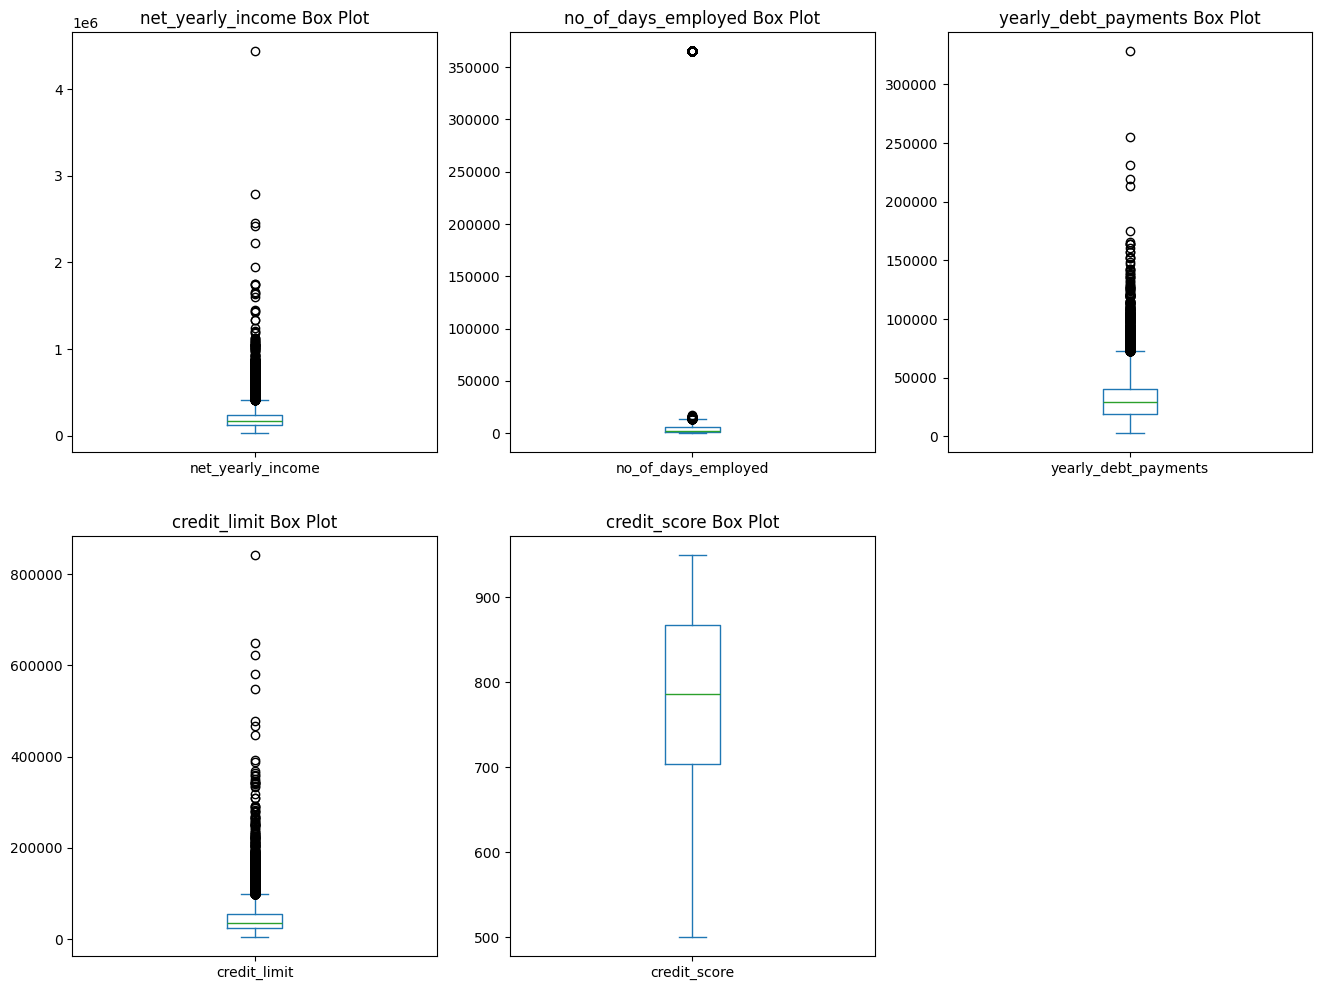

In [62]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

# Data Processing

## Drop columns which have IV < 0.02

In [63]:
import pandas as pd
import numpy as np
import re
import traceback
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

max_bin = 20
force_bin = 3

def mono_bin(Y, X, n=max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[df1.X.isnull()]
    notmiss = df1[df1.X.notnull()]
    
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({
                "X": notmiss.X,
                "Y": notmiss.Y,
                "Bucket": pd.qcut(notmiss.X, n, duplicates='drop')
            })
            d2 = d1.groupby('Bucket', as_index=True)
            r, _ = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n -= 1
        except Exception:
            n -= 1

    if len(d2) == 1:
        n = force_bin
        bins = pd.Series(notmiss.X).quantile(np.linspace(0, 1, n)).values
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1] - (bins[1] / 2)
        d1 = pd.DataFrame({
            "X": notmiss.X,
            "Y": notmiss.Y,
            "Bucket": pd.cut(notmiss.X, np.unique(bins), include_lowest=True)
        })
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame()
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3 = d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': [np.nan]})
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = pd.concat([d3, d4], ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.EVENT.sum()
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.NONEVENT.sum()
    d3["WOE"] = np.log((d3.DIST_EVENT + 1e-5) / (d3.DIST_NON_EVENT + 1e-5))
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * d3["WOE"]
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE',
             'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return d3

def char_bin(Y, X):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[df1.X.isnull()]
    notmiss = df1[df1.X.notnull()]
    
    df2 = notmiss.groupby('X', as_index=True)
    d3 = pd.DataFrame()
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': [np.nan]})
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = pd.concat([d3, d4], ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.EVENT.sum()
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.NONEVENT.sum()
    d3["WOE"] = np.log((d3.DIST_EVENT + 1e-5) / (d3.DIST_NON_EVENT + 1e-5))
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * d3["WOE"]
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE',
             'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return d3

def data_vars(df1, target):
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count += 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count += 1
            if count == 0:
                iv_df = conv
            else:
                iv_df = pd.concat([iv_df, conv], ignore_index=True)
    
    iv = pd.DataFrame({'IV': iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return iv_df, iv

def plot_iv(iv_summary, top_n=10):
    top_iv = iv_summary.sort_values(by='IV', ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_iv, x='IV', y='VAR_NAME', palette='coolwarm')
    plt.title('Top Variables by Information Value')
    plt.xlabel('Information Value (IV)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


C:\Users\omend\AppData\Local\Temp\ipykernel_20632\806390916.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index=True)
C:\Users\omend\AppData\Local\Temp\ipykernel_20632\806390916.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index=True)
C:\Users\omend\AppData\Local\Temp\ipykernel_20632\806390916.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 

                   VAR_NAME        IV
4   default_in_last_6months  7.447119
3              credit_score  6.325212
2      credit_limit_used(%)  5.060598
13            prev_defaults  0.700792
9       no_of_days_employed  0.120454
10          occupation_type  0.096269
5                    gender  0.048502
6            migrant_worker  0.012560
11                 owns_car  0.004524
7         net_yearly_income  0.003464
14     total_family_members  0.002505
8            no_of_children  0.001400
1              credit_limit  0.000470
15     yearly_debt_payments  0.000080
12               owns_house  0.000070
0                       age  0.000002


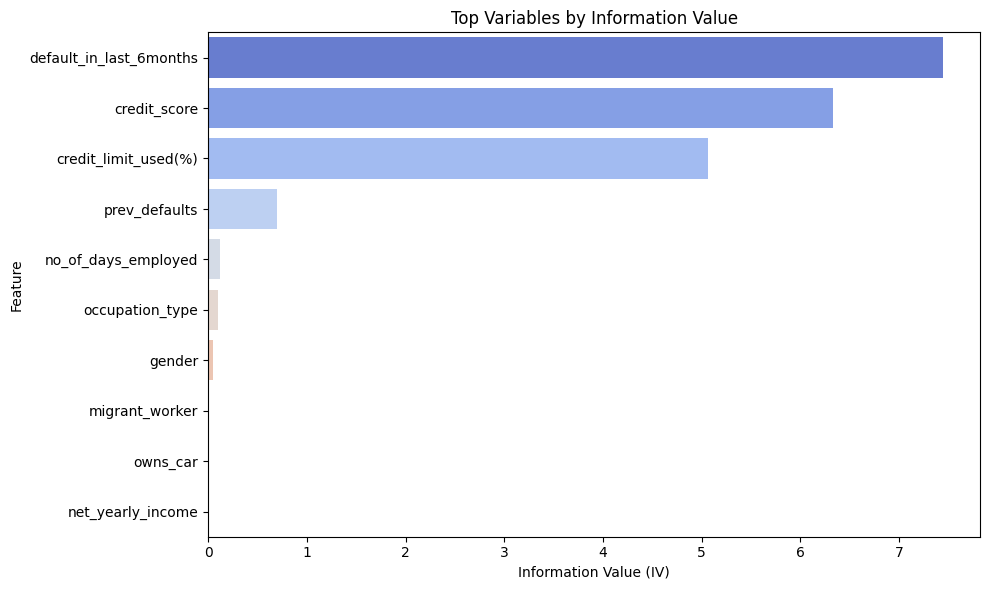

In [64]:
# Assuming df is your DataFrame and 'credit_card_default' is your target
iv_df, iv_summary = data_vars(df.drop(columns=["customer_id", "name", "credit_card_default"]), df["credit_card_default"])

# To view summary
print(iv_summary.sort_values(by="IV", ascending=False))

# Plot top IVs
plot_iv(iv_summary)


In [65]:
iv_summary

,VAR_NAME,IV
0,age,0.000002
1,credit_limit,0.000470
2,credit_limit_used(%),5.060598
3,credit_score,6.325212
4,default_in_last_6months,7.447119
5,gender,0.048502
6,migrant_worker,0.012560
7,net_yearly_income,0.003464
8,no_of_children,0.001400
9,no_of_days_employed,0.120454


In [66]:
iv_summary.sort_values('IV')

,VAR_NAME,IV
0,age,0.000002
12,owns_house,0.000070
15,yearly_debt_payments,0.000080
1,credit_limit,0.000470
8,no_of_children,0.001400
14,total_family_members,0.002505
7,net_yearly_income,0.003464
11,owns_car,0.004524
6,migrant_worker,0.012560
5,gender,0.048502


In [67]:
iv_summary.sort_values('IV', ascending=True).head(10)

,VAR_NAME,IV
0,age,0.000002
12,owns_house,0.000070
15,yearly_debt_payments,0.000080
1,credit_limit,0.000470
8,no_of_children,0.001400
14,total_family_members,0.002505
7,net_yearly_income,0.003464
11,owns_car,0.004524
6,migrant_worker,0.012560
5,gender,0.048502


In [68]:
iv_summary.sort_values('IV', ascending=True).head(10)["VAR_NAME"].values

array(['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
       'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'migrant_worker', 'gender'], dtype=object)

**We will drop some low (< 0.02) IV columns**

In [69]:
low_IV_cols =  ['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
      'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker']

In [70]:
#dt_s = sc.var_filter(df, y="credit_card_default",return_rm_reason=True)

In [71]:
#dt_s["dt"]

## WOE binning

[INFO] creating woe binning ...


c:\Python310\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Python310\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Python310\lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected

{'gender': <Figure size 640x480 with 2 Axes>,
 'default_in_last_6months': <Figure size 640x480 with 2 Axes>,
 'owns_house': <Figure size 640x480 with 2 Axes>,
 'owns_car': <Figure size 640x480 with 2 Axes>,
 'yearly_debt_payments': <Figure size 640x480 with 2 Axes>,
 'occupation_type': <Figure size 640x480 with 2 Axes>,
 'credit_limit_used(%)': <Figure size 640x480 with 2 Axes>,
 'net_yearly_income': <Figure size 640x480 with 2 Axes>,
 'total_family_members': <Figure size 640x480 with 2 Axes>,
 'prev_defaults': <Figure size 640x480 with 2 Axes>,
 'credit_limit': <Figure size 640x480 with 2 Axes>,
 'no_of_days_employed': <Figure size 640x480 with 2 Axes>,
 'no_of_children': <Figure size 640x480 with 2 Axes>,
 'migrant_worker': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'credit_score': <Figure size 640x480 with 2 Axes>}

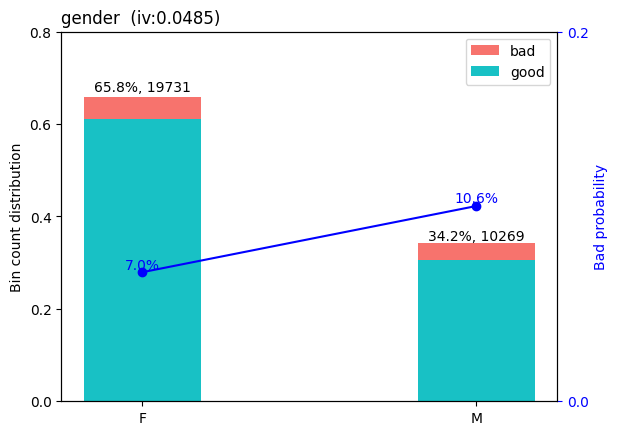

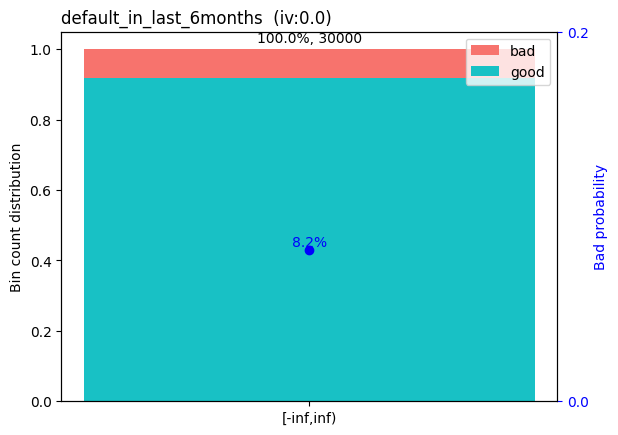

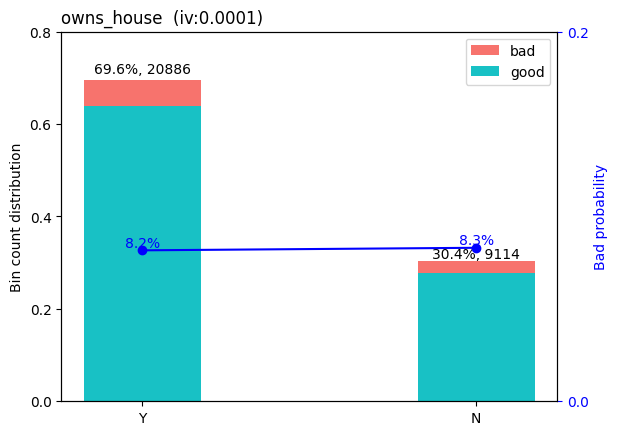

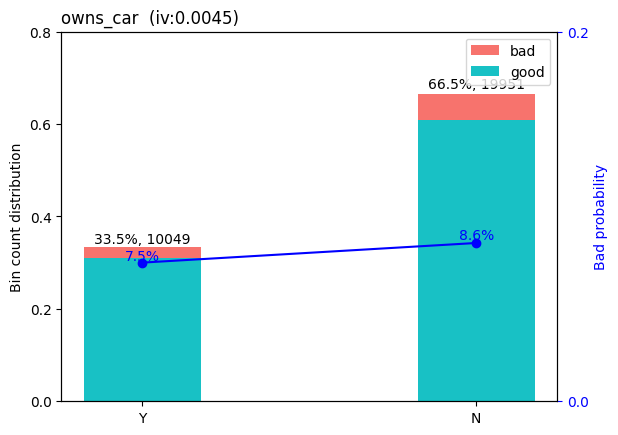

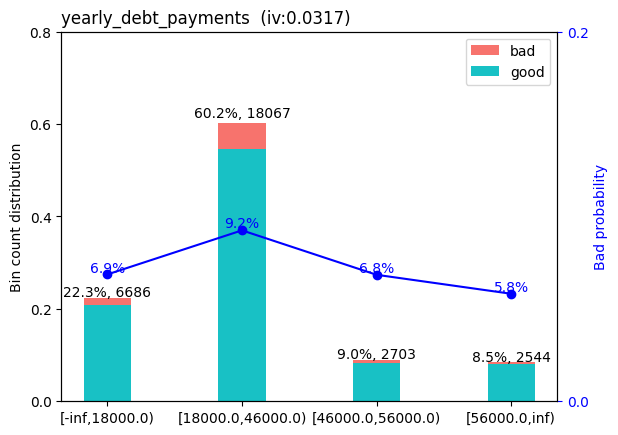

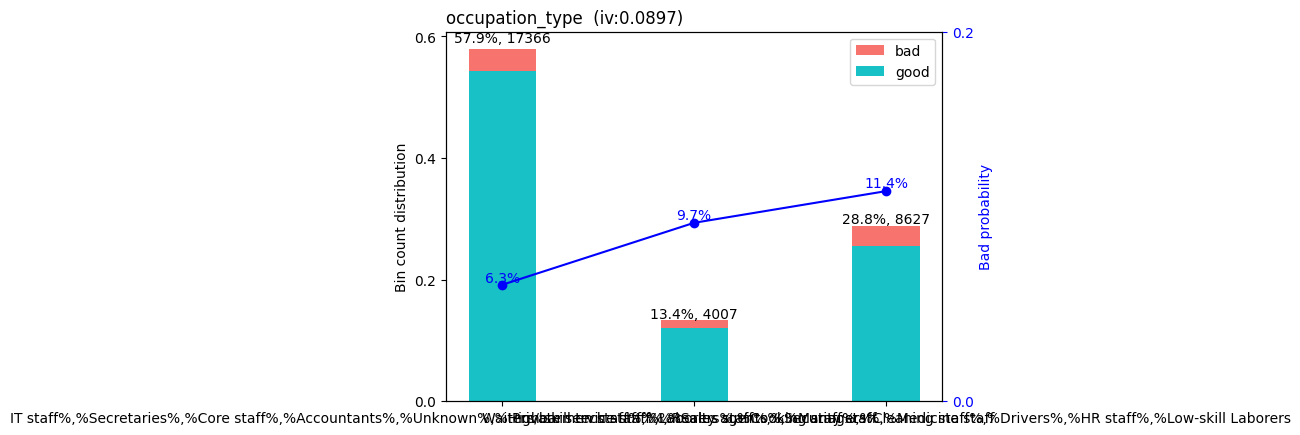

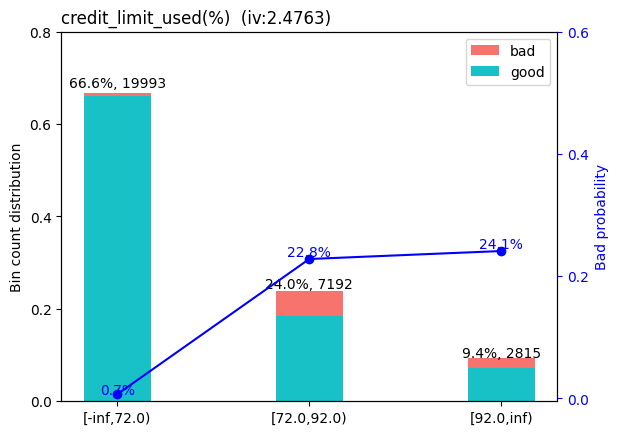

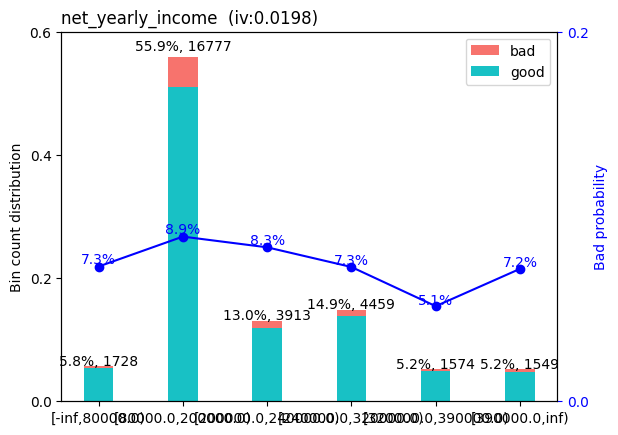

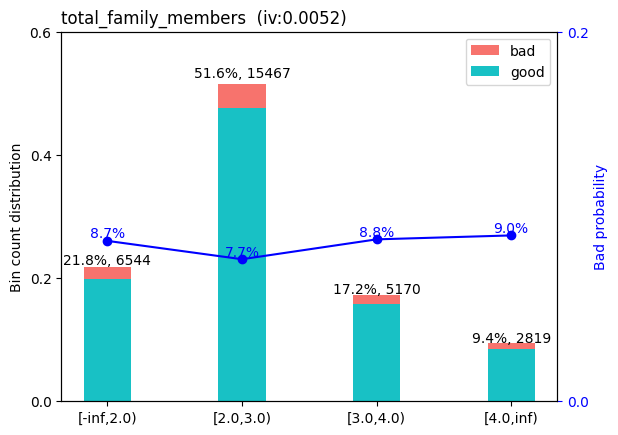

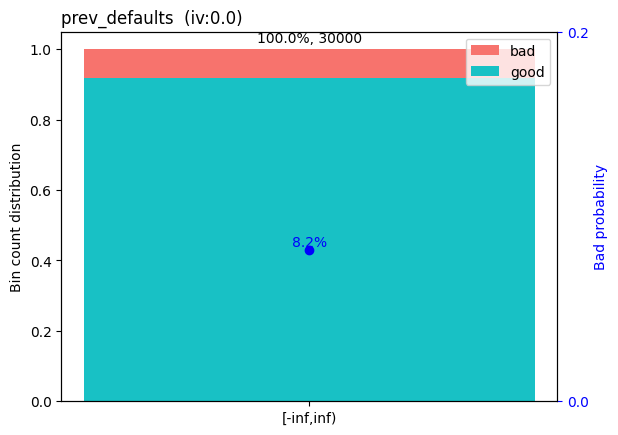

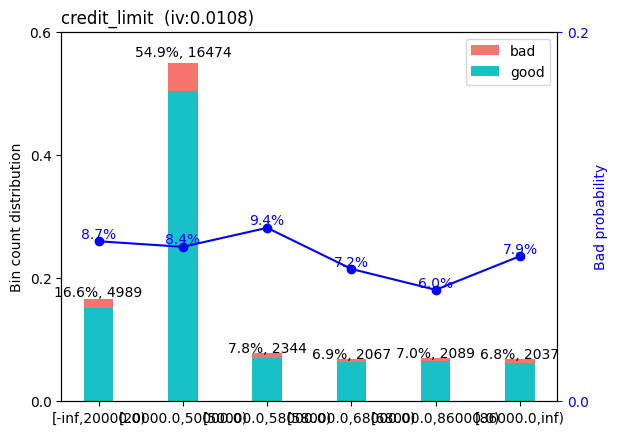

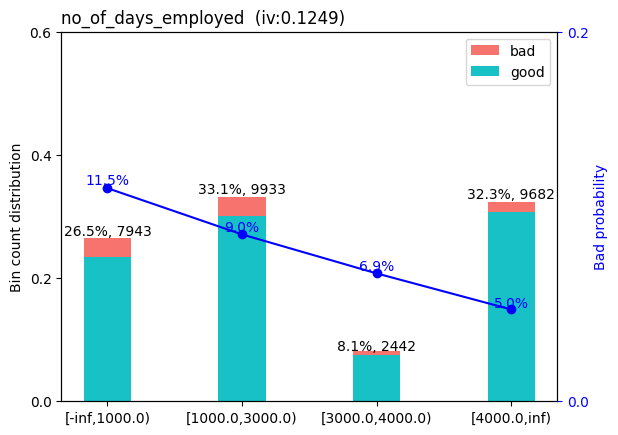

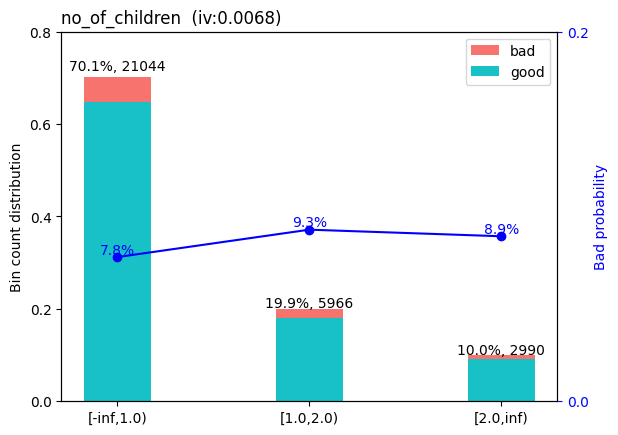

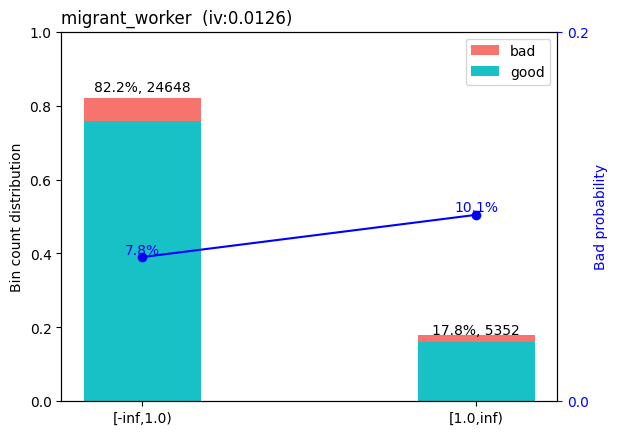

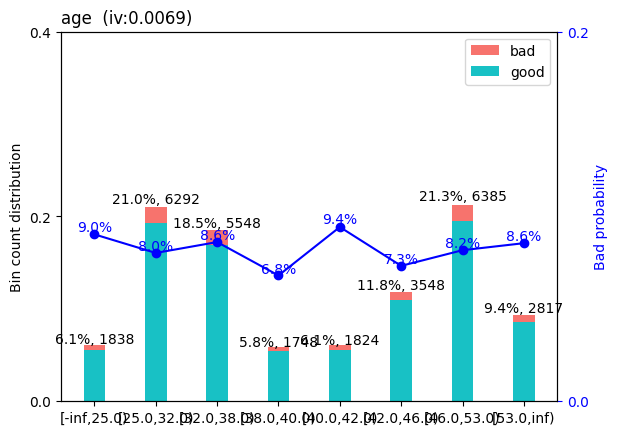

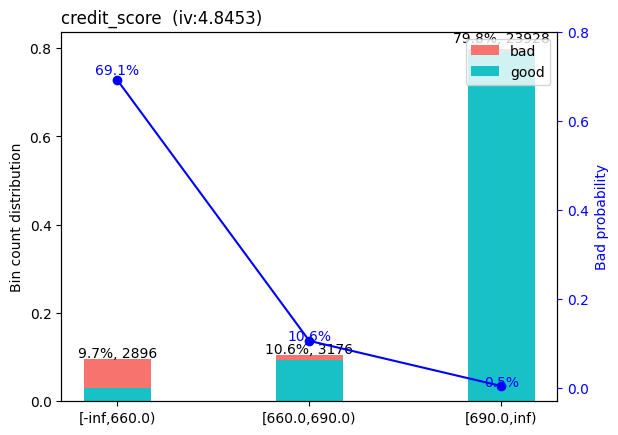

In [72]:
# woe binning ------
bins = sc.woebin(df.drop(columns = ["customer_id", "name"]), y="credit_card_default")
sc.woebin_plot(bins)

In [73]:
# converting train and test into woe values
train_woe = sc.woebin_ply(df, bins)
train_woe.drop(columns = ["customer_id", "name"], inplace = True)
train_woe.head(10)

[INFO] converting into woe values ...


,credit_card_default,credit_limit_used(%)_woe,net_yearly_income_woe,total_family_members_woe,prev_defaults_woe,gender_woe,credit_limit_woe,no_of_days_employed_woe,yearly_debt_payments_woe,default_in_last_6months_woe,no_of_children_woe,migrant_worker_woe,age_woe,credit_score_woe,owns_car_woe,occupation_type_woe,owns_house_woe
34126,0,-2.518964,-0.132349,0.060765,0.0,-0.175009,0.019562,-0.537050,-0.193449,0.0,-0.055311,-0.055429,-0.004599,-2.851316,0.046332,-0.284480,-0.005566
44609,0,-2.518964,0.089601,-0.071457,0.0,-0.175009,0.019562,-0.537050,0.130535,0.0,-0.055311,-0.055429,-0.024660,-2.851316,0.046332,-0.284480,-0.005566
44264,1,1.195478,0.089601,-0.071457,0.0,-0.175009,0.019562,-0.537050,0.130535,0.0,-0.055311,-0.055429,-0.202448,0.286341,0.046332,-0.284480,-0.005566
33556,0,-2.518964,0.015976,0.071114,0.0,-0.175009,0.019562,0.104234,-0.196714,0.0,0.134941,-0.055429,0.052665,-2.851316,-0.097689,-0.284480,-0.005566
28050,0,-2.518964,0.089601,-0.071457,0.0,0.278268,-0.148197,-0.537050,-0.196714,0.0,-0.055311,-0.055429,0.044954,-2.851316,-0.097689,-0.284480,-0.005566
4448,0,-2.518964,0.089601,0.097436,0.0,0.278268,0.058156,0.104234,-0.193449,0.0,0.091910,-0.055429,-0.202448,-2.851316,0.046332,0.360785,-0.005566
15054,0,-2.518964,0.089601,0.060765,0.0,0.278268,-0.148197,0.104234,-0.196714,0.0,-0.055311,-0.055429,-0.024660,-2.851316,0.046332,-0.284480,0.012659
26095,0,-2.518964,0.089601,0.097436,0.0,-0.175009,0.058156,0.104234,0.130535,0.0,0.091910,-0.055429,0.052665,-2.851316,-0.097689,-0.284480,-0.005566
2593,0,-2.518964,0.089601,-0.071457,0.0,-0.175009,0.058156,0.376652,0.130535,0.0,0.134941,-0.055429,0.052665,-2.851316,0.046332,0.360785,-0.005566
297,0,-2.518964,0.015976,0.071114,0.0,-0.175009,0.146722,-0.537050,0.130535,0.0,0.134941,-0.055429,-0.024660,-2.851316,0.046332,-0.284480,-0.005566


In [74]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
old_df = df.copy()

low_IV_cols =  ['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
	  'no_of_children', 'total_family_members', 'net_yearly_income',
	   'owns_car', 'prev_defaults', 'migrant_worker']

df.drop(['customer_id', 'name'] + low_IV_cols, axis=1, inplace=True, errors='ignore')
df.head()

,gender,no_of_days_employed,occupation_type,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
34126,F,4181.0,Unknown,23,807.0,0,0
44609,F,365250.0,Unknown,60,858.0,0,0
44264,F,365241.0,Unknown,81,667.0,0,1
33556,F,1882.0,Managers,32,690.0,0,0
28050,M,365244.0,Unknown,65,721.0,0,0


## Encoding

In [75]:
df["gender"] = df["gender"].apply(lambda x : 1 if x == "F" else 0)
#df["owns_car"] = df["owns_car"].apply(lambda x : 1 if x == "Y" else 0)
#df["owns_house"] = df["owns_house"].apply(lambda x : 1 if x == "Y" else 0)

In [76]:
occupation_type_encoded_df = pd.get_dummies(df["occupation_type"], prefix= "occupation")
df = pd.concat([df, occupation_type_encoded_df], axis=1)
df.drop(columns=["occupation_type"], inplace=True)
df.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
34126,1,4181.0,23,807.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44609,1,365250.0,60,858.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44264,1,365241.0,81,667.0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
33556,1,1882.0,32,690.0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
28050,0,365244.0,65,721.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## Split dataset

In [77]:
# split train-test data
X = df.drop(['credit_card_default'], axis=1)
y = df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (21000, 24) (9000, 24)
y= (21000,) (9000,)


In [78]:
X_train.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
26658,1,365246.0,96,922.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5389,1,1206.0,16,711.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8704,1,4040.0,18,761.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37747,0,96.0,51,854.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
27346,0,5326.0,92,700.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [79]:
y_train

26658    0
5389     0
8704     0
37747    0
27346    0
        ..
34093    0
823      0
32715    0
14006    0
21152    0
Name: credit_card_default, Length: 21000, dtype: int64

In [80]:
# WOE data
X_woe = train_woe.drop(['credit_card_default'], axis=1)
y_woe = train_woe['credit_card_default']

X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.3, stratify=y_woe, random_state=42)

print("X=",X_train_woe.shape, X_test_woe.shape)
print("y=",y_train_woe.shape, y_test_woe.shape)

X= (21000, 16) (9000, 16)
y= (21000,) (9000,)


In [81]:
X_train_woe.head()

,credit_limit_used(%)_woe,net_yearly_income_woe,total_family_members_woe,prev_defaults_woe,gender_woe,credit_limit_woe,no_of_days_employed_woe,yearly_debt_payments_woe,default_in_last_6months_woe,no_of_children_woe,migrant_worker_woe,age_woe,credit_score_woe,owns_car_woe,occupation_type_woe,owns_house_woe
26658,1.268081,0.015976,-0.071457,0.0,-0.175009,0.146722,-0.537050,-0.193449,0.0,-0.055311,-0.055429,0.052665,-2.851316,0.046332,-0.284480,-0.005566
5389,-2.518964,-0.128576,0.071114,0.0,-0.175009,0.058156,0.104234,0.130535,0.0,0.134941,0.226851,0.044954,-2.851316,0.046332,0.360785,-0.005566
8704,-2.518964,0.089601,0.071114,0.0,-0.175009,0.019562,-0.537050,-0.193449,0.0,0.134941,-0.055429,0.104362,-2.851316,0.046332,-0.284480,-0.005566
37747,-2.518964,0.015976,0.060765,0.0,0.278268,0.019562,0.376652,-0.196714,0.0,-0.055311,-0.055429,-0.123203,-2.851316,-0.097689,-0.284480,-0.005566
27346,1.268081,0.089601,-0.071457,0.0,0.278268,0.146722,-0.537050,0.130535,0.0,-0.055311,-0.055429,0.052665,-2.851316,0.046332,0.360785,0.012659


In [82]:
y_woe

34126    0
44609    0
44264    1
33556    0
28050    0
        ..
37523    0
36228    0
32772    0
9762     0
33325    0
Name: credit_card_default, Length: 30000, dtype: int64

## Scaling data

In [83]:
# scaling the features to standardize
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Data Imbalancing Handling

In [84]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [85]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (38552, 24)
Dimension of y_train_sm Shape: (38552,)


In [86]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (38552, 24)
y_train.shape: (38552,)


,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
0,1.0,0.999984,0.969697,0.939866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.003296,0.161616,0.469933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.011055,0.181818,0.581292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000257,0.515152,0.788419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014576,0.929293,0.445434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
y_train.value_counts(normalize=True)

credit_card_default
0    0.5
1    0.5
Name: proportion, dtype: float64

In [88]:
from statsmodels.discrete.discrete_model import Logit
logit = Logit(y_train, X_train)
logit_fit = logit.fit()

         Current function value: 0.098695
         Iterations: 35


c:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [89]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     credit_card_default   No. Observations:                38552
Model:                           Logit   Df Residuals:                    38528
Method:                            MLE   Df Model:                           23
Date:                 Fri, 25 Jul 2025   Pseudo R-squ.:                  0.8576
Time:                         00:08:42   Log-Likelihood:                -3804.9
converged:                       False   LL-Null:                       -26722.
Covariance Type:             nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
gender                              -0.1955      0.072     -2.731      0.006      -0.336      -0.055
no_of_days_employed                 -0.3089      0.115     -2.676      0.007      -0.535      -0.083
credit_limit_used(%)                 9.2967      0.219     42.504      0.000       8.868       9.725
credit_score                       -26.3302      0.615    -42.825      0.000     -27.535     -25.125
default_in_last_6months            216.5010   1.34e+04      0.016      0.987   -2.61e+04    2.65e+04
occupation_Accountants               3.8706      0.315     12.299      0.000       3.254       4.487
occupation_Cleaning staff            4.3175      0.348     12.407      0.000       3.635       5.000
occupation_Cooking staff             4.5699      0.331     13.791      0.000       3.920       5.219
occupation_Core staff                4.1222      0.286     14.414      0.000       3.562       4.683
occupation_Drivers                   4.1146      0.283     14.552      0.000       3.560       4.669
occupation_HR staff                  1.1312      1.233      0.918      0.359      -1.285       3.547
occupation_High skill tech staff     2.8968      0.318      9.113      0.000       2.274       3.520
occupation_IT staff                 -3.2122      3.654     -0.879      0.379     -10.374       3.949
occupation_Laborers                  3.9506      0.271     14.559      0.000       3.419       4.482
occupation_Low-skill Laborers        3.9416      0.412      9.569      0.000       3.134       4.749
occupation_Managers                  3.5844      0.290     12.379      0.000       3.017       4.152
occupation_Medicine staff            3.4496      0.333     10.346      0.000       2.796       4.103
occupation_Private service staff     2.4504      0.430      5.695      0.000       1.607       3.294
occupation_Realty agents             2.4885      0.792      3.143      0.002       0.937       4.040
occupation_Sales staff               3.9199      0.280     14.009      0.000       3.371       4.468
occupation_Secretaries               2.2090      0.592      3.729      0.000       1.048       3.370
occupation_Security staff            3.0221      0.347      8.710      0.000       2.342       3.702
occupation_Unknown                   3.5768      0.276     12.957      0.000       3.036       4.118
occupation_Waiters/barmen staff      5.1816      0.430     12.037      0.000       4.338       6.025
====================================================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

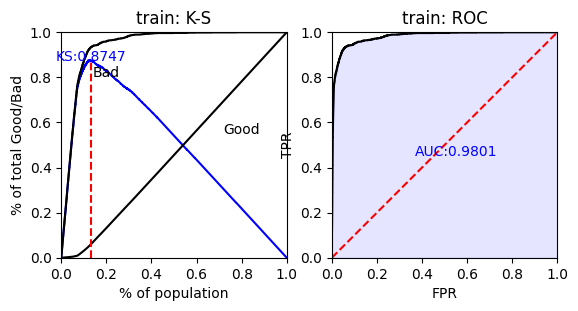

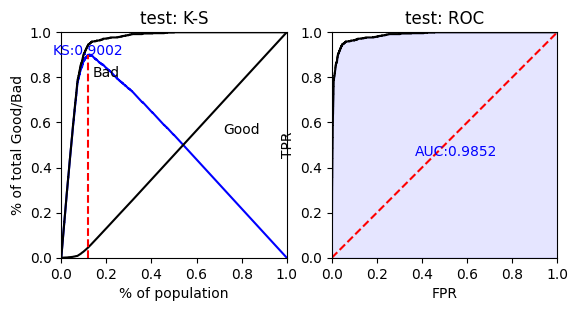

c:\Python310\lib\site-packages\scorecardpy\scorecard.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_score.loc[:,'score'] = card_basepoints + dat_score.sum(axis=1)


In [90]:
# logistic regression ------
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train_woe, y_train_woe)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train_woe)[:,1]
test_pred = lr.predict_proba(X_test_woe)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_woe, train_pred, title = "train")
test_perf = sc.perf_eva(y_test_woe, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train_woe.columns)
# credit score
score = sc.scorecard_ply(old_df, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
#test_score = sc.scorecard_ply(test_woe, card, print_step=0)

In [91]:
score

,credit_limit_used(%)_points,net_yearly_income_points,gender_points,credit_limit_points,no_of_days_employed_points,yearly_debt_payments_points,migrant_worker_points,age_points,credit_score_points,owns_car_points,occupation_type_points,score
34126,177.0,1.0,10.0,-2.0,34.0,15.0,1.0,0.0,201.0,-6.0,7.0,997.0
44609,177.0,-1.0,10.0,-2.0,34.0,-10.0,1.0,1.0,201.0,-6.0,7.0,971.0
44264,-84.0,-1.0,10.0,-2.0,34.0,-10.0,1.0,9.0,-20.0,-6.0,7.0,497.0
33556,177.0,-0.0,10.0,-2.0,-7.0,15.0,1.0,-2.0,201.0,13.0,7.0,972.0
28050,177.0,-1.0,-15.0,12.0,34.0,15.0,1.0,-2.0,201.0,13.0,7.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37523,177.0,-1.0,10.0,-2.0,34.0,-10.0,1.0,1.0,201.0,-6.0,7.0,971.0
36228,177.0,-1.0,10.0,-5.0,-24.0,-10.0,1.0,1.0,201.0,-6.0,-9.0,894.0
32772,177.0,-0.0,10.0,-2.0,-7.0,15.0,1.0,0.0,201.0,-6.0,-4.0,944.0
9762,177.0,-1.0,-15.0,-2.0,-24.0,-10.0,1.0,1.0,201.0,-6.0,-9.0,872.0


(array([ 1471.,   661.,   407.,  1201.,   447.,  5736.,  2845.,   937.,
        13188.,  3107.]),
 array([ 167. ,  257.4,  347.8,  438.2,  528.6,  619. ,  709.4,  799.8,
         890.2,  980.6, 1071. ]),
 <BarContainer object of 10 artists>)

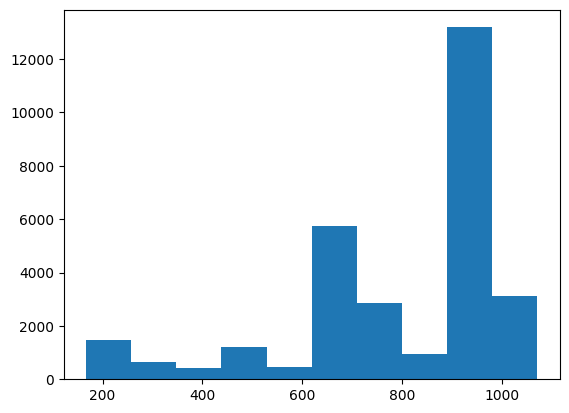

In [92]:
plt.hist(score["score"])

In [93]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)
    
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE: ", rmse)
    
    # calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_test_pred, average=None)
    print("ROC AUC score: ", roc_auc)
    

In [94]:
y_test

11858    0
22651    0
38925    0
2917     0
18012    0
        ..
37539    0
17978    1
5227     0
3994     0
8471     0
Name: credit_card_default, Length: 9000, dtype: int64

## Logisitc Regression

In [95]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [96]:
# prediction
evaluation(logreg)

[[18245  1031]
 [  611 18665]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19276
           1       0.95      0.97      0.96     19276

    accuracy                           0.96     38552
   macro avg       0.96      0.96      0.96     38552
weighted avg       0.96      0.96      0.96     38552

Accuracy of TRAIN data: 95.74081759701183
F1_Score of TRAIN data: 95.74031202556064
[[7800  461]
 [  19  720]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8261
           1       0.61      0.97      0.75       739

    accuracy                           0.95      9000
   macro avg       0.80      0.96      0.86      9000
weighted avg       0.97      0.95      0.95      9000

Accuracy of TEST data: 94.66666666666667
F1_Score of TEST data: 86.00746268656717
RMSE:  0.23094010767585033
ROC AUC score:  0.9592425992390677


## Decision Tree

In [97]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [98]:
# prediction
evaluation(tree_model)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8060  201]
 [  88  651]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.76      0.88      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.78888888888889
F1_Score of TEST data: 90.03704755086228
RMSE:  0.17919573407620817
ROC AUC score:  0.928294483805494


## Random Forest

In [99]:
regr_rfr = RandomForestClassifier(random_state=42, oob_score=True)
regr_rfr.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [100]:
# prediction
evaluation(regr_rfr)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8016  245]
 [  72  667]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.73      0.90      0.81       739

    accuracy                           0.96      9000
   macro avg       0.86      0.94      0.89      9000
weighted avg       0.97      0.96      0.97      9000

Accuracy of TEST data: 96.47777777777777
F1_Score of TEST data: 89.43027946704156
RMSE:  0.1876758434701233
ROC AUC score:  0.936456807743446


## CatBoost

In [101]:
reg_catb = CatBoostClassifier(random_seed=42)
reg_catb.fit(X_train, y_train)

Learning rate set to 0.048998
0:	learn: 0.5821847	total: 159ms	remaining: 2m 39s
1:	learn: 0.4555872	total: 169ms	remaining: 1m 24s
2:	learn: 0.3595332	total: 177ms	remaining: 58.7s
3:	learn: 0.3106789	total: 186ms	remaining: 46.2s
4:	learn: 0.2697032	total: 193ms	remaining: 38.5s
5:	learn: 0.2387672	total: 204ms	remaining: 33.9s
6:	learn: 0.1946611	total: 212ms	remaining: 30.1s
7:	learn: 0.1764069	total: 222ms	remaining: 27.5s
8:	learn: 0.1538568	total: 230ms	remaining: 25.3s
9:	learn: 0.1413220	total: 239ms	remaining: 23.6s
10:	learn: 0.1257604	total: 248ms	remaining: 22.3s
11:	learn: 0.1140674	total: 257ms	remaining: 21.2s
12:	learn: 0.1040012	total: 269ms	remaining: 20.4s
13:	learn: 0.0966850	total: 281ms	remaining: 19.8s
14:	learn: 0.0912452	total: 291ms	remaining: 19.1s
15:	learn: 0.0879683	total: 304ms	remaining: 18.7s
16:	learn: 0.0846553	total: 316ms	remaining: 18.3s
17:	learn: 0.0829259	total: 327ms	remaining: 17.8s
18:	learn: 0.0805997	total: 339ms	remaining: 17.5s
19:	learn

In [102]:
# prediction
evaluation(reg_catb)

[[19062   214]
 [   26 19250]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19276
           1       0.99      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.37746420419174
F1_Score of TRAIN data: 99.37744939959684
[[8055  206]
 [  78  661]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.76      0.89      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.84444444444445
F1_Score of TEST data: 90.29198636138027
RMSE:  0.1776388345929897
ROC AUC score:  0.9347577568695465


## XGBoost

In [103]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    learning_rate=0.05,
    n_estimators=250,
    max_depth=6,
    min_child_weight=3,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

c:\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [00:09:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, ...)

In [104]:
# prediction
evaluation(xgb_model)

[[18585   691]
 [   32 19244]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     19276
           1       0.97      1.00      0.98     19276

    accuracy                           0.98     38552
   macro avg       0.98      0.98      0.98     38552
weighted avg       0.98      0.98      0.98     38552

Accuracy of TRAIN data: 98.12461091512762
F1_Score of TRAIN data: 98.12406277031936
[[7949  312]
 [  27  712]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8261
           1       0.70      0.96      0.81       739

    accuracy                           0.96      9000
   macro avg       0.85      0.96      0.89      9000
weighted avg       0.97      0.96      0.97      9000

Accuracy of TEST data: 96.23333333333333
F1_Score of TEST data: 89.34179412992412
RMSE:  0.19407902170679517
ROC AUC score:  0.9628481580060799


In [105]:
xgb_model.feature_importances_

array([0.00486355, 0.00800479, 0.07720587, 0.245417  , 0.5910454 ,
       0.00696048, 0.00346843, 0.00302712, 0.00424083, 0.00436964,
       0.        , 0.00671131, 0.        , 0.00558692, 0.        ,
       0.00447317, 0.00701137, 0.00489456, 0.        , 0.0045543 ,
       0.00486318, 0.00432803, 0.00505572, 0.00391834], dtype=float32)

In [106]:
from xgboost import plot_importance

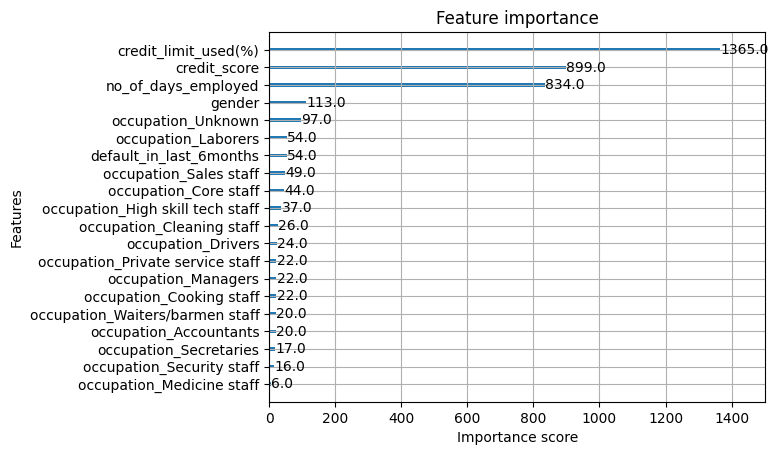

<Figure size 640x480 with 0 Axes>

In [107]:
plot_importance(xgb_model)
plt.show()
plt.savefig("Feature importance.png")

## LightGBM

In [108]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19276, number of negative: 19276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 38552, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [109]:
# prediction
evaluation(lgbm_model)

[[18968   308]
 [   35 19241]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19276
           1       0.98      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.11029259182403
F1_Score of TRAIN data: 99.11024797481507
[[8024  237]
 [  62  677]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.74      0.92      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.94      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.67777777777778
F1_Score of TEST data: 90.0412969761847
RMSE:  0.18226964152656422
ROC AUC score:  0.9437069104891351


## KNN

In [110]:
# # iterating knn model for all values of k from 1-39
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

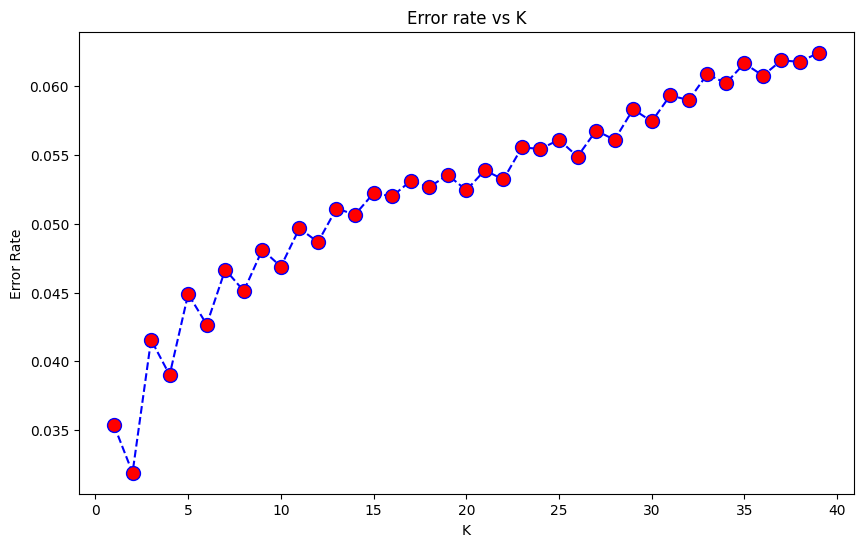

In [111]:
# ploting the error_rate

plt.figure(figsize=[10,6])
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
          marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

Choose k = 2

In [112]:
# # building knn and fit the model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [113]:
# # Evaluation
evaluation(knn)

[[19276     0]
 [  243 19033]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19276
           1       1.00      0.99      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.36968250674414
F1_Score of TRAIN data: 99.36965746322618
[[8066  195]
 [  92  647]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.77      0.88      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.81111111111112
F1_Score of TEST data: 90.04947870709792
RMSE:  0.17857460314638499
ROC AUC score:  0.9259512760203765


In [114]:
import joblib

# Save models in current directory
joblib.dump(logreg, 'logistic_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(lgbm_model, 'lgbm_model.pkl')
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(tree_model, 'decision_tree_model.pkl')
joblib.dump(regr_rfr, 'random_forest_model.pkl')
joblib.dump(reg_catb, 'catboost_model.pkl')

# Save WOE logistic model
joblib.dump(lr, 'logistic_model_woe.pkl')

# Save Scaler and WOE binning object
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(bins, 'scorecard_bins.pkl')

print("✅ All models and transformers saved in current folder.")


✅ All models and transformers saved in current folder.


In [115]:
# --- Save Scaler with Feature Names used for transformation ---
scaler = MinMaxScaler()
final_features = X_train.columns  # This includes one-hot encoded occupations

# Fit and transform using final columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=final_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=final_features)

# Reassign before saving
X_train = X_train_scaled
X_test = X_test_scaled

# Save the updated scaler and feature names used
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(list(final_features), 'scaler_features.pkl')  # 🔥 New addition

print("✅ Scaler and scaler_features.pkl saved.")


✅ Scaler and scaler_features.pkl saved.
